In [1]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("CUDA is not available.")

CUDA is available!
Number of GPUs: 1
Current GPU: NVIDIA GeForce RTX 4070 Laptop GPU


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import time

# Base URL
BASE_URL = "https://www.manilatimes.net/business/page/{}"

# Number of pages you want to scrape
START_PAGE = 7461   # Change this as needed
NUM_PAGES = 7462   # Change this as needed

# Output CSV file
OUTPUT_FILE = "manilatimes_business_news.csv"

# Headers for HTTP request
HEADERS = {"User-Agent": "Mozilla/5.0"}

# List to store news data
# news_data = []

for page in range(START_PAGE, NUM_PAGES + 1):
    url = BASE_URL.format(page)
    print(f"Scraping page {page}: {url}")

    response = requests.get(url, headers=HEADERS)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all article elements 
    articles = soup.find_all("div", class_="col-1 mr-b20")  # Updated selector

    # Extract title and date
    for article in articles:
        title_tag = article.find("div", class_="article-title-h4 ellipsis-2 mr-b10")
        date_tag = article.find("span", class_="roboto-a")

        title = title_tag.get_text(strip=True) if title_tag else None
        date = date_tag.get_text(strip=True)[2:] if date_tag else None

        if title:
            news_data.append({"title": title, "date": date})

    # Be polite – wait a second between requests
    time.sleep(1)

# Save results to CSV
with open(OUTPUT_FILE, mode="w", newline="", encoding="utf-8-sig") as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=["date", "title"])
    writer.writeheader()
    writer.writerows(news_data)

print(f"✅ Scraping complete. {len(news_data)} articles saved to {OUTPUT_FILE}")



Scraping page 7461: https://www.manilatimes.net/business/page/7461
Scraping page 7462: https://www.manilatimes.net/business/page/7462
✅ Scraping complete. 89518 articles saved to manilatimes_business_news.csv


In [18]:
print(news_data[slice(5)])
len(news_data)/12

[{'title': 'Rice supply safe, corn at risk from Tino – DA', 'date': 'November 6, 2025'}, {'title': 'Crackdown on predatory lending ordered by Recto', 'date': 'November 6, 2025'}, {'title': 'Konektadong Pinoy rules inked; investments seen', 'date': 'November 6, 2025'}, {'title': 'Peso volatility seen easing as remittances strengthen', 'date': 'November 6, 2025'}, {'title': 'Transparency ‘not optional,’ business groups tell Ombudsman', 'date': 'November 6, 2025'}]


7459.833333333333

In [24]:
import pandas as pd

df = pd.DataFrame(news_data, columns=['date', 'title'])
display(df)

df.to_csv('output.csv', encoding="utf-8-sig", index=False, header=True) # Add headers if needed

,date,title
0,"November 6, 2025","Rice supply safe, corn at risk from Tino – DA"
1,"November 6, 2025",Crackdown on predatory lending ordered by Recto
2,"November 6, 2025",Konektadong Pinoy rules inked; investments seen
3,"November 6, 2025",Peso volatility seen easing as remittances str...
4,"November 6, 2025","Transparency ‘not optional,’ business groups t..."
...,...,...
89513,"January 1, 2014","Buildings, homes benefit from safety window films"
89514,"January 1, 2014",SM Development taps GQWEST for water stations
89515,"January 1, 2014",New PSE electronic board up and ready this year
89516,"December 31, 2013",FCDU loans up in Q3 to $10 billion


In [30]:
df2 = pd.read_csv("output_clean.csv")
display(df2)
df2.to_csv('output_clean_utf8.csv', encoding="utf-8-sig", index=False, header=True)
print(df2.dtypes)

,date,title,year,month,day
0,31-Oct-25,Philippines sees trade deficit narrow in Septe...,2025,10,31
1,31-Oct-25,"Peso, PSEi drop with easing in doubt",2025,10,31
2,31-Oct-25,Fed lowers rates but Powell suggests move may ...,2025,10,31
3,31-Oct-25,Trump shaves China tariffs in deal with Xi on ...,2025,10,31
4,31-Oct-25,Government trims outstanding debt to P17.65T i...,2025,10,31
...,...,...,...,...,...
87580,1-Jan-14,Culture of sharing,2014,1,1
87581,1-Jan-14,Federal Land eyes up to 6 real estate projects...,2014,1,1
87582,1-Jan-14,"Buildings, homes benefit from safety window films",2014,1,1
87583,1-Jan-14,SM Development taps GQWEST for water stations,2014,1,1


date     object
title    object
year      int64
month     int64
day       int64
dtype: object


In [35]:
from datetime import date

df2['date2'] = pd.to_datetime(df2[['year', 'month', 'day']])

display(df2)
print(df2.dtypes)

,date,title,year,month,day,date2
0,31-Oct-25,Philippines sees trade deficit narrow in Septe...,2025,10,31,2025-10-31
1,31-Oct-25,"Peso, PSEi drop with easing in doubt",2025,10,31,2025-10-31
2,31-Oct-25,Fed lowers rates but Powell suggests move may ...,2025,10,31,2025-10-31
3,31-Oct-25,Trump shaves China tariffs in deal with Xi on ...,2025,10,31,2025-10-31
4,31-Oct-25,Government trims outstanding debt to P17.65T i...,2025,10,31,2025-10-31
...,...,...,...,...,...,...
87580,1-Jan-14,Culture of sharing,2014,1,1,2014-01-01
87581,1-Jan-14,Federal Land eyes up to 6 real estate projects...,2014,1,1,2014-01-01
87582,1-Jan-14,"Buildings, homes benefit from safety window films",2014,1,1,2014-01-01
87583,1-Jan-14,SM Development taps GQWEST for water stations,2014,1,1,2014-01-01


date             object
title            object
year              int64
month             int64
day               int64
date2    datetime64[ns]
dtype: object


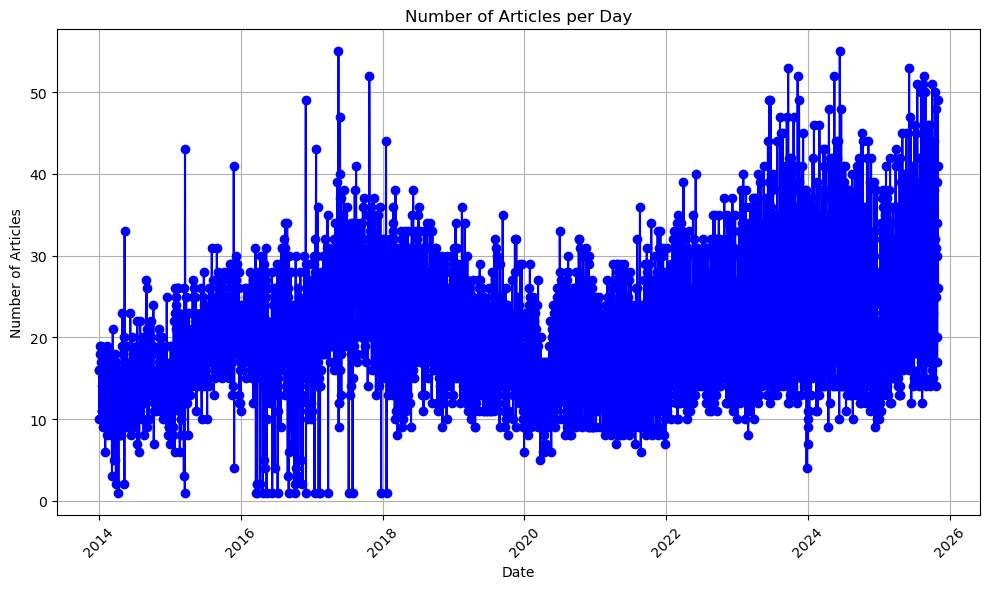

In [39]:
import matplotlib.pyplot as plt

# Group by Date and count the number of rows (items) for each date
article_per_day = df2.groupby('date2').size()

# Plotting the time series graph
plt.figure(figsize=(10, 6))
plt.plot(article_per_day.index, article_per_day.values, marker='o', linestyle='-', color='b')
plt.title('Number of Articles per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better readability
plt.show()
